In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from IPython.display import clear_output
import collections
from matplotlib import animation


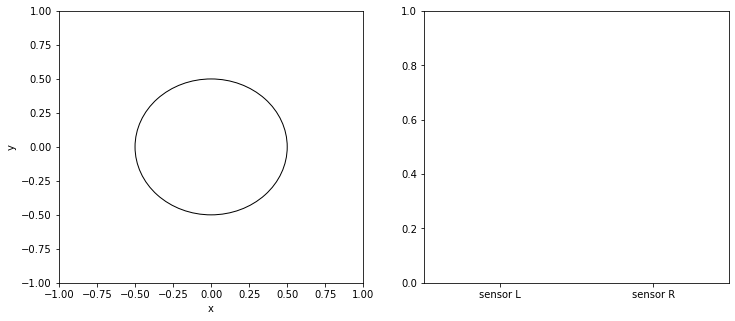

In [69]:
# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( -1, 1))            
ax1.set_ylim((-1, 1))
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.set_ylim((0, 1))

circle1 = plt.Circle((0, 0), 0.5, color='black', fill = 0)
ax1.add_patch(circle1)

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
pt1, = ax1.plot([], [], 'g.', ms=30)
s1, = ax1.plot([],[], 'r.', ms =20)
s2, = ax1.plot([],[], 'r.', ms =20)
bar1, bar2 = ax2.bar(['sensor L', 'sensor R'],[0,0])


In [95]:
degree = 0
heading = 0
def drawframe(n):
    global degree, heading
    #x = np.linspace(0, 2, 1000)
    x = np.sin(2 * np.pi * degree/360)
    y = np.cos(2 * np.pi * degree/360)
    
    s1x = .5 * np.sin(2 * np.pi * (heading + 15)/360)
    s1y = .5 * np.cos(2 * np.pi * (heading + 15)/360)
    
    s2x = .5 * np.sin(2 * np.pi * (heading - 15)/360)
    s2y = .5 * np.cos(2 * np.pi * (heading - 15)/360)
    
    d1 = np.abs(degree - heading + 15)
    if d1 > 180:
        d1 = 360 - d1

    d2 = np.abs(degree - heading - 15)
    if d2 > 180:
        d2 = 360 - d2
    
    s1_act = 1 - d1/180
    s2_act = 1 - d2/180
    
    pt1.set_data(x,y)
    s1.set_data(s1x,s1y)
    s2.set_data(s2x,s2y)
    bar1.set_height(s1_act)
    bar2.set_height(s2_act)
    
    txt_title.set_text('Frame = {0:4d}'.format(n))
    
    degree+=1
    if degree == 360:
        degree = 0
    heading-=1
    if heading == 360:
        heading = 0
    if heading == -1:
        heading = 359
        
    return (pt1,s1,s2)


In [94]:
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=360, interval=20, blit=True)


UnboundLocalError: local variable 'degree' referenced before assignment

In [92]:
HTML(anim.to_html5_video())

# alternate

In [26]:
#%matplotlib inline
import time
import pylab as pl
from IPython import display
    
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(1,1,1)   

# set up the subplots as needed
ax1.set_xlim(( -1, 1))            
ax1.set_ylim((-1, 1))
ax1.set_xlabel('x')
ax1.set_ylabel('y')

circle1 = plt.Circle((0, 0), 0.5, color='black', fill = 0)

ax1.add_patch(circle1)

txt_title = ax1.set_title('')

pt1, = ax1.plot([], [], 'g.', ms=20)

for f in range(0,720):
    
    if f == 0:
        degree = 0
    x = np.sin(2 * np.pi * degree/360)
    y = np.cos(2 * np.pi * degree/360)
    pt1.set_data(x,y)
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.1)
    
    #plt.pause(0.1)
    degree += 1
    if degree == 360:
        degree = 0
        


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

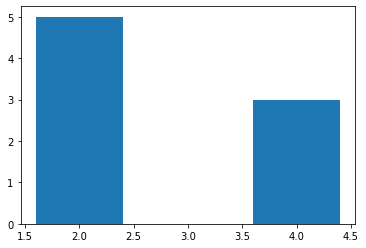

In [63]:
graph1, graph2 = plt.bar([4, 2], [3, 5])